## Import Library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [153]:
!pip -q install CausalImpact
from causalimpact import CausalImpact

In [3]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from pandas import Series
from matplotlib import pyplot

plt.rcParams['figure.figsize'] = 12, 8

## Upload and Import Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Closed施策効果検証_nonPII.xlsx to Closed施策効果検証_nonPII.xlsx


In [15]:
df1 = pd.read_excel('Closed施策効果検証_nonPII.xlsx', sheet_name='202302', index_col=0)
df1['DARPU'] = df1['DARPU'].astype(int)
df2 = pd.read_excel('Closed施策効果検証_nonPII.xlsx', sheet_name='202211', index_col=0)
df2['DARPU'] = df2['DARPU'].astype(int)

In [16]:
df1

,SI_NUMBER,ENTRY_CODE,ENTRY_BONUS,TERMINATED_DATE,SHORT_CHURN,CUMULATIVE_LINES,MALICE_FLG,加入翌日まで売上,DARPU,FLG_1_7,FLG_1_30,FLG_3_30,FLG_3_90,FLG_9,FLG_20,FLG_50,FLG_60,FLG_150,FLG_24HUL,FLG_7DUL
ACTIVATION_DATE,,,,,,,,,,,,,,,,,,,,
2023-02-05,LW000000001,NaN,NaN,NaT,0,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-04,LW000000002,35_KOTATSU,データボーナス1GB（7日間）,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-05,LW000000003,NaN,NaN,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-11,LW000000004,01_referral,データボーナス3GB（30日間）,NaT,0,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-10,LW000000005,NaN,NaN,NaT,0,1,0,900,900,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07,LW000018555,01_referral,データボーナス3GB（30日間）,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-11,LW000018556,NaN,NaN,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-05,LW000018557,NaN,NaN,NaT,0,1,0,300,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
print(df1['ENTRY_CODE'].unique())
print(df1['ENTRY_BONUS'].unique())

[nan '35_KOTATSU' '01_referral' '07_Zendesk' '05_Google' '37_other'
 '27_HIKARU' '03_hellopovo' '02_amazon' '36_MIKAN' '08_TRYPOVO'
 '30_VICTORY' '29_OPPO' '32_TONAKAI' '24_GOODLUCK']
[nan 'データボーナス1GB（7日間）' 'データボーナス3GB（30日間）' 'データ使い放題ボーナス（24時間）' '不明'
 'データボーナス500MB（3日間）' '3GB/20GB']


In [17]:
df2

,SI_NUMBER,ENTRY_CODE,ENTRY_BONUS,TERMINATED_DATE,SHORT_CHURN,CUMULATIVE_LINES,MALICE_FLG,加入翌日まで売上,DARPU,FLG_1_7,FLG_1_30,FLG_3_30,FLG_3_90,FLG_9,FLG_20,FLG_50,FLG_60,FLG_150,FLG_24HUL,FLG_7DUL
ACTIVATION_DATE,,,,,,,,,,,,,,,,,,,,
2022-11-27,LW000000001,NaN,NaN,NaT,0,1,0,355,355,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-20,LW000000002,NaN,NaN,NaT,0,1,0,300,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-11-30,LW000000003,01_referral,データボーナス3GB（30日間）,2022-12-17,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-24,LW000000004,NaN,NaN,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-29,LW000000005,01_referral,データボーナス3GB（30日間）,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-10,LW000061215,01_referral,データボーナス3GB（30日間）,NaT,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-08,LW000061216,NaN,NaN,2022-12-27,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-27,LW000061217,30_VICTORY,データ使い放題ボーナス（24時間）,NaT,0,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
print(df2['ENTRY_CODE'].unique())
print(df2['ENTRY_BONUS'].unique())

[nan '01_referral' '30_VICTORY' '05_Google' '03_hellopovo' '07_Zendesk'
 '02_amazon' '28_povoFAN' '08_TRYPOVO' '26_RYOKUSHAKA' '09_POVOTRAIN'
 '22_IKASA2022' '29_OPPO' '04_showroom' '27_HIKARU']
[nan 'データボーナス3GB（30日間）' 'データ使い放題ボーナス（24時間）' '3GB/20GB' 'データボーナス1GB（24時間）'
 'データボーナス1GB（7日間）' 'データボーナス500MB（3日間）']


# Prepare Dataset

In [41]:
df1_agg = df1.groupby(['ACTIVATION_DATE','ENTRY_BONUS','DARPU','加入翌日まで売上']).agg({'SI_NUMBER':pd.Series.nunique})
df1_pur = df1.groupby(['ACTIVATION_DATE','DARPU','加入翌日まで売上']).agg({'SI_NUMBER':pd.Series.nunique})
df1_nonpur = df1[df1['DARPU']==0]
df1_nonpur_sum = df1_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df1_pur_sum = df1.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df1_pur_sum = df1_pur_sum.merge(df1_nonpur_sum, on='ACTIVATION_DATE')
df1_pur_sum['pur_rate'] = 1 - (df1_pur_sum['Non_purchasers']/df1_pur_sum['GA'])
df1_pur_sum1 = df1_pur_sum.reset_index()
df1_pur_sum1 = df1_pur_sum1.reset_index()
df1_pur_sum

,GA,DARPU,加入翌日まで売上,Non_purchasers,pur_rate
ACTIVATION_DATE,,,,,
2023-02-01,2204,1048534,2516476,1504,0.317604
2023-02-02,1607,630073,1410337,1168,0.273180
2023-02-03,1528,525751,1128923,1144,0.251309
2023-02-04,1748,742014,1741735,1216,0.304348
2023-02-05,1797,756444,1785702,1238,0.311074
2023-02-06,1274,508150,1182091,916,0.281005
2023-02-07,1375,449823,939987,1042,0.242182
2023-02-08,1294,470755,970167,959,0.258887
2023-02-09,1320,423905,975832,1009,0.235606


In [42]:
df2_agg = df2.groupby(['ACTIVATION_DATE','ENTRY_BONUS','DARPU','加入翌日まで売上']).agg({'SI_NUMBER':pd.Series.nunique})
df2_pur = df2.groupby(['ACTIVATION_DATE','DARPU','加入翌日まで売上']).agg({'SI_NUMBER':pd.Series.nunique})
df2_nonpur = df2[df2['DARPU']==0]
df2_nonpur_sum = df2_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df2_pur_sum = df2.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df2_pur_sum = df2_pur_sum.merge(df2_nonpur_sum, on='ACTIVATION_DATE')
df2_pur_sum['pur_rate'] = 1 - (df2_pur_sum['Non_purchasers']/df2_pur_sum['GA'])
df2_pur_sum1 = df2_pur_sum.reset_index()
df2_pur_sum1 = df2_pur_sum1.reset_index()
df2_pur_sum

,GA,DARPU,加入翌日まで売上,Non_purchasers,pur_rate
ACTIVATION_DATE,,,,,
2022-11-01,3218,1159632,2660887,2405,0.252641
2022-11-02,2086,681473,1404347,1555,0.254554
2022-11-03,2708,922716,2097697,2009,0.258124
2022-11-04,1877,544572,1094682,1456,0.224294
2022-11-05,2259,578954,1299660,1771,0.216025
2022-11-06,2077,776421,1720503,1466,0.294174
2022-11-07,1755,507073,1115885,1366,0.221652
2022-11-08,1444,496471,1035359,1061,0.265235
2022-11-09,1458,438530,995426,1112,0.237311


# 可視化

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2_pur_sum1['index'], y=df2_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=df1_pur_sum1['index'], y=df1_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

現時点で、DIDの仮定を満たしているとは思えないので、まずは探索的に満たせるレベルまで落とし込む

そのためには悪意者の排除、エントリーコード別にみてみるなどの方法が取れる

DIDの仮定

**・平行トレンド仮定**

**・共通ショック仮定**

共通ショック仮定に関してはエントリーコードの揃えである程度満たせそうか検証

平行トレンド仮定は調整後に示唆が得られるかどうかがキー

# 悪意者を抜いたデータセットの用意

In [133]:
df2_excl_mali = df2[df2['MALICE_FLG']!=1]

df2_nonpur = df2_excl_mali[df2_excl_mali['DARPU']==0]
df2_nonpur_sum = df2_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df2_pur_sum = df2_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df2_pur_sum = df2_pur_sum.merge(df2_nonpur_sum, on='ACTIVATION_DATE')
df2_pur_sum['pur_rate'] = 1 - (df2_pur_sum['Non_purchasers']/df2_pur_sum['GA'])
df2_pur_sum1 = df2_pur_sum.reset_index()
df2_pur_sum1 = df2_pur_sum1.reset_index()
df2_pur_sum_kore = df2_pur_sum1


In [134]:
df1_excl_mali = df1[df1['MALICE_FLG']!=1]

df1_nonpur = df1_excl_mali[df1_excl_mali['DARPU']==0]
df1_nonpur_sum = df1_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df1_pur_sum = df1_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df1_pur_sum = df1_pur_sum.merge(df1_nonpur_sum, on='ACTIVATION_DATE')
df1_pur_sum['pur_rate'] = 1 - (df1_pur_sum['Non_purchasers']/df1_pur_sum['GA'])
df1_pur_sum1 = df1_pur_sum.reset_index()
df1_pur_sum1 = df1_pur_sum1.reset_index()
df1_pur_sum_kore = df1_pur_sum1

# 可視化2 (悪意者抜き)

In [128]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2_pur_sum1['index'], y=df2_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=df1_pur_sum1['index'], y=df1_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

悪意者を抜いた場合の購入率をみることでまずは共通ショック仮定を満たせる方向性でできているので

あとは平行トレンド仮定を満たせるかどうかである

次にエントリーコードが付き合わせられるかどうかを可視化する

# エントリーコード合わせ

In [93]:
df1_excl_mali1 = df1_excl_mali[df1_excl_mali['DARPU']!=0]
df1_excl_mali_agg = df1_excl_mali1.groupby(['ACTIVATION_DATE','ENTRY_BONUS']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'Purchasers'})
df1_excl_mali_agg = df1_excl_mali_agg.reset_index()
df1_excl_mali_agg['ACTIVATION_DATE'] = df1_excl_mali_agg['ACTIVATION_DATE'].astype(str)
df1_excl_mali_agg['day_match'] = df1_excl_mali_agg['ACTIVATION_DATE'].str[8:11]

df1_excl_mali_agg0 = df1_excl_mali.groupby(['ACTIVATION_DATE','ENTRY_BONUS']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Total_used'})
df1_excl_mali_agg0 = df1_excl_mali_agg0.reset_index()
df1_excl_mali_agg0['ACTIVATION_DATE'] = df1_excl_mali_agg0['ACTIVATION_DATE'].astype(str)

df1_excl_mali_agg = df1_excl_mali_agg.merge(df1_excl_mali_agg0, on=['ACTIVATION_DATE','ENTRY_BONUS'])
df1_excl_mali_agg['pur_rate_feb'] = (df1_excl_mali_agg['Purchasers']/df1_excl_mali_agg['Total_used'])

# df1_excl_mali_agg

In [94]:
df2_excl_mali1 = df2_excl_mali[df2_excl_mali['DARPU']!=0]
df2_excl_mali_agg = df2_excl_mali1.groupby(['ACTIVATION_DATE','ENTRY_BONUS']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'Purchasers'})
df2_excl_mali_agg = df2_excl_mali_agg.reset_index()
df2_excl_mali_agg['ACTIVATION_DATE'] = df2_excl_mali_agg['ACTIVATION_DATE'].astype(str)
df2_excl_mali_agg['day_match'] = df2_excl_mali_agg['ACTIVATION_DATE'].str[8:11]

df2_excl_mali_agg0 = df2_excl_mali.groupby(['ACTIVATION_DATE','ENTRY_BONUS']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Total_used'})
df2_excl_mali_agg0 = df2_excl_mali_agg0.reset_index()
df2_excl_mali_agg0['ACTIVATION_DATE'] = df2_excl_mali_agg0['ACTIVATION_DATE'].astype(str)

df2_excl_mali_agg = df2_excl_mali_agg.merge(df2_excl_mali_agg0, on=['ACTIVATION_DATE','ENTRY_BONUS'])
df2_excl_mali_agg['pur_rate_nov'] = (df2_excl_mali_agg['Purchasers']/df2_excl_mali_agg['Total_used'])

# df2_excl_mali_agg

In [110]:
df1_excl_mali1['ENTRY_BONUS'].unique()

array([nan, 'データ使い放題ボーナス（24時間）', 'データボーナス3GB（30日間）', '不明',
       'データボーナス1GB（7日間）', 'データボーナス500MB（3日間）', '3GB/20GB'], dtype=object)

In [111]:
df2_excl_mali1['ENTRY_BONUS'].unique()

array([nan, 'データ使い放題ボーナス（24時間）', 'データボーナス3GB（30日間）', '3GB/20GB'],
      dtype=object)

In [ ]:
merge_df = df2_excl_mali_agg.merge(df1_excl_mali_agg, on=['day_match','ENTRY_BONUS'], how='inner')
merge_df

In [98]:
merge_df_comp = merge_df[['day_match','ENTRY_BONUS','pur_rate_nov','pur_rate_feb']]
merge_df_comp

,day_match,ENTRY_BONUS,pur_rate_nov,pur_rate_feb
0,01,データボーナス3GB（30日間）,0.092965,0.089256
1,01,データ使い放題ボーナス（24時間）,0.102041,0.193548
2,02,データボーナス3GB（30日間）,0.085437,0.042254
3,02,データ使い放題ボーナス（24時間）,0.166667,0.285714
4,03,データボーナス3GB（30日間）,0.088235,0.075209
5,03,データ使い放題ボーナス（24時間）,0.142857,0.333333
6,04,データボーナス3GB（30日間）,0.089806,0.089059
7,04,データ使い放題ボーナス（24時間）,0.139535,0.368421
8,05,データボーナス3GB（30日間）,0.085586,0.088362
9,05,データ使い放題ボーナス（24時間）,0.217391,0.545455


In [106]:
merge_df_comp_3GB = merge_df_comp[merge_df_comp['ENTRY_BONUS'].str.contains('データボーナス3GB')]
merge_df_comp_24 = merge_df_comp[merge_df_comp['ENTRY_BONUS'].str.contains('データ使い放題')]

# 可視化　エントリー別

In [105]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merge_df_comp_3GB['day_match'], y=merge_df_comp_3GB['pur_rate_nov'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=merge_df_comp_3GB['day_match'], y=merge_df_comp_3GB['pur_rate_feb'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

In [107]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merge_df_comp_24['day_match'], y=merge_df_comp_24['pur_rate_nov'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=merge_df_comp_24['day_match'], y=merge_df_comp_24['pur_rate_feb'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

# エントリーコードと悪意者を考慮した場合の購入率をみる

In [125]:
df2_excl_mali = df2[df2['MALICE_FLG']!=1]
df2_excl_mali = df2_excl_mali[(df2_excl_mali['ENTRY_BONUS'].str.contains('データボーナス3'))|(df2_excl_mali['ENTRY_BONUS'].str.contains('データ使い放題'))]

df2_nonpur = df2_excl_mali[df2_excl_mali['DARPU']==0]
df2_nonpur_sum = df2_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df2_pur_sum = df2_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df2_pur_sum = df2_pur_sum.merge(df2_nonpur_sum, on='ACTIVATION_DATE')
df2_pur_sum['pur_rate'] = 1 - (df2_pur_sum['Non_purchasers']/df2_pur_sum['GA'])
df2_pur_sum1 = df2_pur_sum.reset_index()
df2_pur_sum1 = df2_pur_sum1.reset_index()

# df2_pur_sum

In [120]:
df1_excl_mali = df1[df1['MALICE_FLG']!=1]
df1_excl_mali = df1_excl_mali[(df1_excl_mali['ENTRY_BONUS'].str.contains('データボーナス3'))|(df1_excl_mali['ENTRY_BONUS'].str.contains('データ使い放題'))]

df1_nonpur = df1_excl_mali[df1_excl_mali['DARPU']==0]
df1_nonpur_sum = df1_nonpur.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique}).rename(columns={'SI_NUMBER':'Non_purchasers'})
df1_pur_sum = df1_excl_mali.groupby(['ACTIVATION_DATE']).agg({'SI_NUMBER':pd.Series.nunique,'DARPU':'sum','加入翌日まで売上':'sum'}).rename(columns={'SI_NUMBER':'GA'})
df1_pur_sum = df1_pur_sum.merge(df1_nonpur_sum, on='ACTIVATION_DATE')
df1_pur_sum['pur_rate'] = 1 - (df1_pur_sum['Non_purchasers']/df1_pur_sum['GA'])
df1_pur_sum1 = df1_pur_sum.reset_index()
df1_pur_sum1 = df1_pur_sum1.reset_index()
# df1_pur_sum

# 可視化（悪意者抜きとエントリーコード合わせ）

In [122]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2_pur_sum1['index'], y=df2_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=df1_pur_sum1['index'], y=df1_pur_sum1['pur_rate'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

以上から、悪意者抜きエントリーコード合わせの平行トレンド仮定は満たせるかギリギリ（むしろOUT）で、そもそも購入者も少なくなってしまうので、一旦は悪意者抜きのみでWorkすることとする

# データセットの準備

In [327]:
merege_df = df2_pur_sum_kore.merge(df1_pur_sum_kore, on=['index'], how='left')
merege_df = merege_df[['index','pur_rate_y','pur_rate_x']].rename(columns={'pur_rate_x':'pur_rate_Nov','pur_rate_y':'pur_rate_Feb'})
merege_df

,index,pur_rate_Feb,pur_rate_Nov
0,0,0.319890,0.271906
1,1,0.275819,0.275898
2,2,0.253968,0.296549
3,3,0.306982,0.253823
4,4,0.312291,0.245464
5,5,0.283902,0.328310
6,6,0.243223,0.275301
7,7,0.261719,0.286462
8,8,0.237586,0.249639
9,9,0.232129,0.273016


In [328]:
print(merege_df['pur_rate_Nov'][0:11].mean())
print(merege_df['pur_rate_Nov'][12:29].mean())
print(merege_df['pur_rate_Feb'].mean())

0.26991713077137747
0.2658299221171512
0.2745921758593114


購入率はデイリーで見ると確かに平行トレンドを満たしていないように思える

平均値に均した時に、購入率の平均値が90%以上一致しているので、平均にしたときにまずは似ていることで、ここで平行トレンド仮定をある程度満たしているとみなす

11月のこのデータを用いて2月後半の反実仮想的な予測値を出す

In [329]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merege_df['index'], y=merege_df['pur_rate_Nov'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Nov'))
fig.add_trace(go.Scatter(x=merege_df['index'], y=merege_df['pur_rate_Feb'],
                    mode='lines',
                    name='加入翌日までの購入率推移_Feb'))

fig.show()

# CausalImpact適用

In [330]:
from datetime import datetime, timedelta, date, time
until = 11
merege_df = merege_df.set_index('index')

In [331]:
#擬似的に購入率が0.32になったと仮定する
merege_df = merege_df[0:28]
merege_df = merege_df.fillna(0.32)
# 2月13日から2月28日までの日付を作成する
new_dates = pd.date_range(start='2023-02-13', end='2023-02-28', freq='D')
date_df = df1_pur_sum1[['Date']]
# date_df= date_df.rename(columns={'ACTIVATION_DATE':'Date'})
date_df = date_df.append(pd.DataFrame({'Date': new_dates}), ignore_index=True)
merege_df['Date'] = date_df['Date']
merege_df

,pur_rate_Feb,pur_rate_Nov,Date
index,,,
0,0.319890,0.271906,2023-02-01
1,0.275819,0.275898,2023-02-02
2,0.253968,0.296549,2023-02-03
3,0.306982,0.253823,2023-02-04
4,0.312291,0.245464,2023-02-05
5,0.283902,0.328310,2023-02-06
6,0.243223,0.275301,2023-02-07
7,0.261719,0.286462,2023-02-08
8,0.237586,0.249639,2023-02-09


In [332]:
merege_df = merege_df.set_index('Date')

In [333]:
pre_period = ['2023-02-01', '2023-02-12']
post_period = ['2023-02-13', '2023-02-28']

In [334]:
merege_df = merege_df*100

In [335]:
ci = CausalImpact(merege_df, pre_period, post_period)
ci.run()

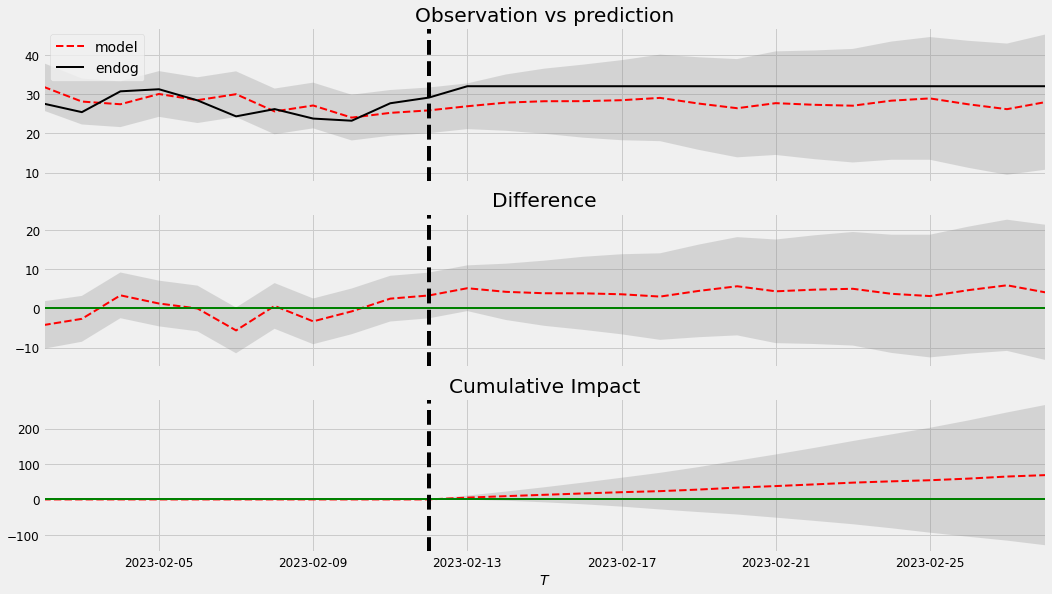

In [336]:
ci.plot(figsize=(16, 9))

In [337]:
print(ci.summary())

                                Average       Cumulative
Actual                               32              512
Predicted                            27              443
95% CI                         [15, 40]       [244, 641]
                                                        
Absolute Effect                       4               68
95% CI                         [16, -8]      [267, -129]
                                                        
Relative Effect                   15.5%            15.5%
95% CI                  [60.3%, -29.3%]  [60.3%, -29.3%]
                                                        
P-value                            0.0%                 
Prob. of Causal Effect           100.0%                 
None
